In [76]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [5]:
filepath = os.path.join('..','data','2023_Most_Streamed_clean.csv')
df = pd.read_csv(filepath)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,rank_streams
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,125,...,Major,80,89,83,31,0,8,4,2023-07-14,0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,...,Major,71,61,74,7,0,10,4,2023-03-23,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,...,Major,51,32,53,17,0,31,6,2023-06-30,2
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,170,...,Major,55,58,72,11,0,11,15,2019-08-23,3
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,...,Minor,65,23,80,14,63,11,6,2023-05-18,4


In [6]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'bpm', 'key', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%', 'released_date', 'rank_streams'],
      dtype='object')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 55 to 123
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   bpm                   953 non-null    int64 
 10  key                   953 non-null    object
 11  mode                  953 non-null    object
 12  danceability_%        953 non-null    int64 
 13  valence_%             953 non-null    int64 
 14  energy_%              953 non-null    int64 
 15  acousticness_%        953 non-null    i

# 1. Facteur de succès = nb de streams sur Spotify

In [7]:
df = df.sort_values('streams',ascending=False)
df.head() 

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,rank_streams
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,171,...,Major,50,38,80,0,0,9,7,2019-11-29,55
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,96,...,Minor,83,93,65,58,0,9,8,2017-01-06,179
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,110,...,Major,50,45,41,75,0,11,3,2018-11-08,86
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,98,...,Minor,82,54,59,69,0,18,10,2019-05-10,620
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,90,...,Major,76,91,50,54,0,7,5,2018-10-09,41


In [8]:
df['rank_streams']= np.arange(df.shape[0])
df.head() 

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,rank_streams
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,171,...,Major,50,38,80,0,0,9,7,2019-11-29,0
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,96,...,Minor,83,93,65,58,0,9,8,2017-01-06,1
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,110,...,Major,50,45,41,75,0,11,3,2018-11-08,2
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,98,...,Minor,82,54,59,69,0,18,10,2019-05-10,3
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,90,...,Major,76,91,50,54,0,7,5,2018-10-09,4


In [12]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,rank_streams
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.135982e+08,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,476.000000
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668036e+08,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,275.251703
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.413817e+08,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,238.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,476.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,714.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,952.000000


In [ ]:
fig = px.histogram(df['streams'], title='Distribution of nb of streams')
fig.show()

Most streamed tracks have 150M and 700M streams on Spotify, with a median at 290M streams
The distribution's average is at 514M streams, highly skewed by the top-performing tracks, max being at 4B views

In [66]:
fig = px.box(df['streams'], title='Distribution of nb of streams')
fig.show()

In [114]:
df_top10=df.iloc[:10]
df_top10

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,rank_streams
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,171,...,Major,50,38,80,0,0,9,7,2019-11-29,0
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,96,...,Minor,83,93,65,58,0,9,8,2017-01-06,1
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,110,...,Major,50,45,41,75,0,11,3,2018-11-08,2
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,98,...,Minor,82,54,59,69,0,18,10,2019-05-10,3
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,90,...,Major,76,91,50,54,0,7,5,2018-10-09,4
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,104,...,Major,77,36,63,1,0,36,5,2016-04-04,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,170,...,Major,59,48,76,4,0,10,5,2021-07-09,6
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,125,...,Minor,77,74,78,4,0,23,11,2017-01-31,7
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,95,...,Major,75,64,52,41,0,11,3,2016-05-31,8
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,186,...,Major,68,49,59,16,0,13,28,2016-09-21,9


In [64]:
df_line_mean = pd.Series(np.full(10, df['streams'].mean()))

In [65]:
df_line_median = pd.Series(np.full(10, df['streams'].median()))

In [ ]:
fig = px.bar(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
             y=df_top10['streams'], 
             labels={'x':'track name', 'y':'nb of streams'})

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_mean, 
                          mode = 'lines', 
                          marker_color='orange',
                          name="nb of streams' mean"))

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_median, 
                          mode = 'lines', 
                          marker_color='blue',
                          name="nb of streams' median"))

fig.update_layout(height=600, title='Nb of streams for the TOP10 tracks, compared to mean and median')
fig.show()

# 2. Caractéristiques audio des morceaux qui marchent

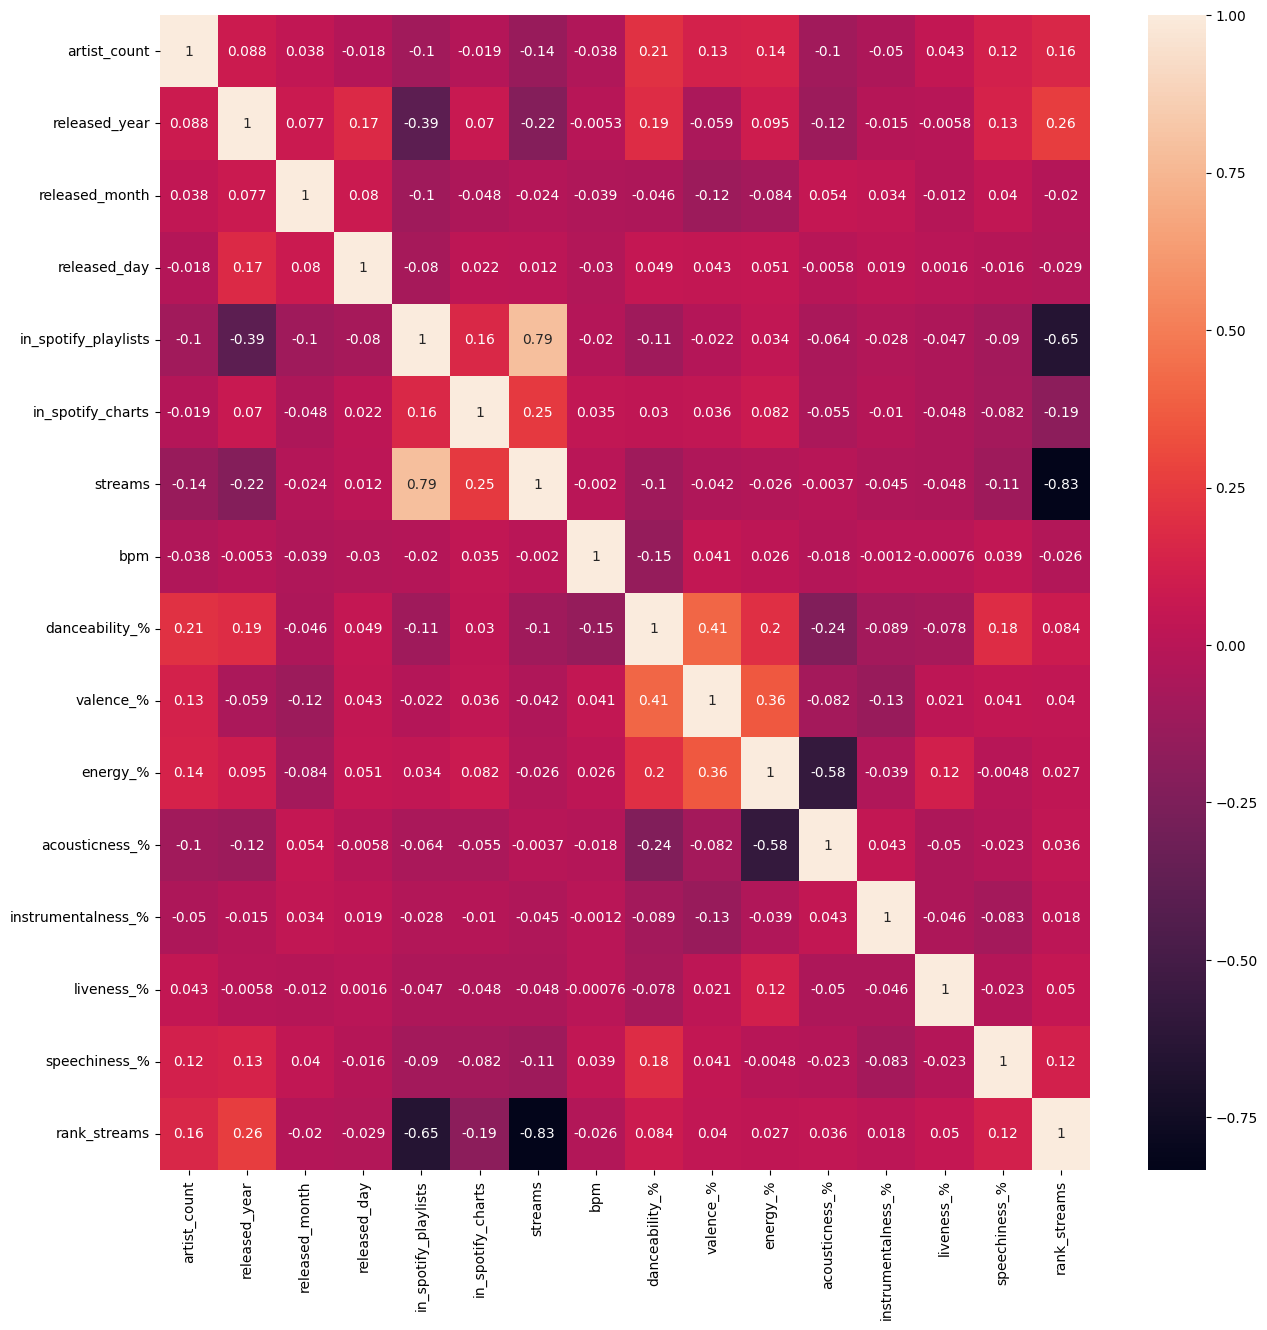

In [96]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),   
           annot=True)
plt.show()

In [ ]:
df_corr = df.corr()
df_corr_audio = df_corr['streams']
df_corr_audio = df_corr_audio.drop(['artist_count','released_year','released_month','released_day','in_spotify_playlists','in_spotify_charts','streams','rank_streams'],axis=0)
df_corr_audio = df_corr_audio.sort_values() # sorted
df_corr_audio 

speechiness_%        -0.111569
danceability_%       -0.104452
liveness_%           -0.048232
instrumentalness_%   -0.044703
valence_%            -0.041748
energy_%             -0.026311
acousticness_%       -0.003747
bpm                  -0.002011
Name: streams, dtype: float64

There does not seem to be a correlation between nb of streams and the audio features (correlation < 0.5 in absolute value).

Let's still see the audio patterns behind our ~1000 top-streaming songs until 2023, starting with the audio features with highest correlation.

## 2.1. Speechiness - Amount of spoken words (corr = -0.11)
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

Example: `0.0556`

### Most popular songs have a low speechiness, between 4-11% (median: 6%), which can be considered as almost with no spoken words. Note that the mean (10%) is skewed by several outliers with higher speechiness. 

In [113]:
df['speechiness_%'].describe()

count    953.000000
mean      10.131165
std        9.912888
min        2.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       64.000000
Name: speechiness_%, dtype: float64

In [110]:
fig = px.histogram(df['speechiness_%'], title='Distribution of speechiness')

fig.show()

In [112]:
fig = px.box(df['speechiness_%'], title='Distribution of speechiness')
fig.show()

In [120]:
df_line_mean_speech = pd.Series(np.full(10, df['speechiness_%'].mean()))
df_line_median_speech = pd.Series(np.full(10, df['speechiness_%'].median()))

fig = px.bar(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
             y=df_top10['speechiness_%'], 
             labels={'x':'track name', 'y':'speechiness'})

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_mean_speech, 
                          mode = 'lines', 
                          marker_color='orange',
                          name="speechiness mean"))

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_median_speech, 
                          mode = 'lines', 
                          marker_color='blue',
                          name="speechiness median"))


fig.update_layout(height=600, title='Speechiness for the TOP10 tracks, compared to mean and median')
fig.show()

## 2.2. Instrumentalness - instrumental track or with vocals (corr = -0.04)
Although ranked 4th in the correlation matrix between audio features and streams, let's focus now on this audio feature that seems related to speechiness (but in practice is not: correlation between both is low, -0.08!).

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Example: `0.00686`

### Most popular songs contain vocals (0% instrumentalness). The TOP10 songs are 100% vocal. This makes sense with the speechiness % analyzed above: popular songs have vocals, but not too much.

In [122]:
df['instrumentalness_%'].describe()

count    953.000000
mean       1.581322
std        8.409800
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       91.000000
Name: instrumentalness_%, dtype: float64

In [ ]:
fig = px.histogram(df['instrumentalness_%'], title='Distribution of instrumentalness')
fig.show()

In [131]:
# We won't show this graph as most values being 0, it will not show any bar

# df_line_mean_instru = pd.Series(np.full(10, df['instrumentalness_%'].mean()))
# df_line_median_instru = pd.Series(np.full(10, df['instrumentalness_%'].median()))

# fig = px.bar(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
#              y=df_top10['instrumentalness_%'], 
#              labels={'x':'track name', 'y':'instrumentalness'})

# fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
#                           y=df_line_mean_instru, 
#                           mode = 'lines', 
#                           marker_color='orange',
#                           name="instrumentalness mean"))

# fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
#                           y=df_line_median_instru, 
#                           mode = 'lines', 
#                           marker_color='blue',
#                           name="instrumentalness median"))

# fig.update_layout(height=600, title='Instrumentalness for the TOP10 tracks, compared to mean and median')
# fig.show()

In [130]:
fig = px.box(df['instrumentalness_%'], title='Distribution of instrumentalness')
fig.show()

In [129]:
df_top10[['track_name','instrumentalness_%']]

,track_name,instrumentalness_%
55,Blinding Lights,0
179,Shape of You,0
86,Someone You Loved,0
620,Dance Monkey,0
41,Sunflower - Spider-Man: Into the Spider-Verse,0
162,One Dance,0
84,STAY (with Justin Bieber),0
140,Believer,0
725,Closer,0
48,Starboy,0


## 2.3. Danceability - how suitable the song is for dancing (corr = -0.10)
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

### Most popular songs are very suitable for dancing, with a danceability between 60 and 80%, and a mean/median around 68%. However, contrary to instrumentalness and speechiness which had a very narrow range, danceability has a broader range, with some TOP3 songs having a danceability lower than average, at 50% ('Blinding lights', 'Someone you loved')

In [133]:
df['danceability_%'].describe()

count    953.00000
mean      66.96957
std       14.63061
min       23.00000
25%       57.00000
50%       69.00000
75%       78.00000
max       96.00000
Name: danceability_%, dtype: float64

In [140]:
fig = px.histogram(df['danceability_%'], title='Distribution of danceability', nbins=30)
fig.show()

In [141]:
fig = px.box(df['danceability_%'], title='Distribution of danceability')
fig.show()

In [136]:
df_line_mean_dance = pd.Series(np.full(10, df['danceability_%'].mean()))
df_line_median_dance = pd.Series(np.full(10, df['danceability_%'].median()))

fig = px.bar(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
             y=df_top10['danceability_%'], 
             labels={'x':'track name', 'y':'danceability'})

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_mean_dance, 
                          mode = 'lines', 
                          marker_color='orange',
                          name="danceability mean"))

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_median_dance, 
                          mode = 'lines', 
                          marker_color='blue',
                          name="danceability median"))


fig.update_layout(height=600, title='Danceability for the TOP10 tracks, compared to mean and median')
fig.show()

## 2.4. Liveness - Presence of live performance elements (corr = -0.05)
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

### Most popular songs have a low liveness, between 10-24% (median at 12%), showing studio tracks make more streams. Only 2 tracks of the TOP10 have a higher liveness than average with 'One Dance' achieving even 35%. However, those are all studio tracks, and almost no popular song is live (only 5 tracks, i.e. 0.5% have a liveness >80%).

In [142]:
df['liveness_%'].describe()

count    953.000000
mean      18.213012
std       13.711223
min        3.000000
25%       10.000000
50%       12.000000
75%       24.000000
max       97.000000
Name: liveness_%, dtype: float64

In [155]:
df.loc[df['liveness_%'] > 80]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,rank_streams
688,Mal Feito - Ao Vivo,"Marï¿½ï¿½lia Mendonï¿½ï¿½a, Hugo & G",2,2022,1,14,971,2,291709698,124,...,Minor,73,68,83,55,0,90,7,2022-01-14,474
601,Vai Lï¿½ï¿½ Em Casa,"Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &",2,2021,10,22,772,0,263894529,158,...,Minor,46,62,83,53,0,97,28,2021-10-22,506
367,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",2,2022,11,3,1254,6,263453310,158,...,Major,65,72,95,31,0,92,5,2022-11-03,508
229,Seu Brilho Sumiu - Ao Vivo,"Israel & Rodolffo, Mari Fernandez",2,2023,3,1,967,5,138517666,154,...,Major,63,75,92,31,0,91,5,2023-03-01,721
94,Still With You,Jung Kook,1,2020,6,5,31,39,38411956,88,...,Minor,53,34,47,9,0,83,4,2020-06-05,928


In [ ]:
df.loc[df['liveness_%'] > 80].shape[0]*100/df.shape[0] # % of live tracks

0.5246589716684156

In [143]:
fig = px.histogram(df['liveness_%'], title='Distribution of liveness')
fig.show()

In [144]:
fig = px.box(df['liveness_%'], title='Distribution of liveness')
fig.show()

In [145]:
df_line_mean_live = pd.Series(np.full(10, df['liveness_%'].mean()))
df_line_median_live = pd.Series(np.full(10, df['liveness_%'].median()))

fig = px.bar(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
             y=df_top10['liveness_%'], 
             labels={'x':'track name', 'y':'liveness'})

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_mean_live, 
                          mode = 'lines', 
                          marker_color='orange',
                          name="liveness mean"))

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_median_live, 
                          mode = 'lines', 
                          marker_color='blue',
                          name="liveness median"))


fig.update_layout(height=600, title='Liveness for the TOP10 tracks, compared to mean and median')
fig.show()

## 2.5. Valence (corr = -0.04)
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Range: `0` - `1` 

Example: `0.428`

### Valence distribution is quite even and symmetrical around the mean/median 51%. Most values are between 32% and 70%. Popular songs can either have high valence and convey positive energy, or have low valence, conveying sad vibes, as well as neutral valence. This makes sense as we tend to listen to songs in various contexts (to feel energized and pumped, comforted when sad, to focus...). We find higher and lower than average valence tracks among the TOP10, which ranges between more extreme values: from 36% to 93%.

In [161]:
df['valence_%'].describe()

count    953.000000
mean      51.431270
std       23.480632
min        4.000000
25%       32.000000
50%       51.000000
75%       70.000000
max       97.000000
Name: valence_%, dtype: float64

In [168]:
fig = px.histogram(df['valence_%'], title='Distribution of valence')
fig.show()


In [169]:
fig = px.box(df['valence_%'], title='Distribution of valence')
fig.show()

In [170]:
df_line_mean_valence = pd.Series(np.full(10, df['valence_%'].mean()))
df_line_median_valence = pd.Series(np.full(10, df['valence_%'].median()))

fig = px.bar(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
             y=df_top10['valence_%'], 
             labels={'x':'track name', 'y':'valence'})

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_mean_valence, 
                          mode = 'lines', 
                          marker_color='orange',
                          name="valence mean"))

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_median_valence, 
                          mode = 'lines', 
                          marker_color='blue',
                          name="valence median"))


fig.update_layout(height=600, title='Valence for the TOP10 tracks, compared to mean and median')
fig.show()

## 2.6. Energy (corr = -0.03)
Energy is a measure from 0 to 100 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

### Most popular songs have a rather high energy, between 53% and 77%. Mean and median are close, at around 65%. TOP10 tracks have values below and above average, from 41% ('Someone you love') to 80% ('Blinding lights') !

In [171]:
df['energy_%'].describe()

count    953.000000
mean      64.279119
std       16.550526
min        9.000000
25%       53.000000
50%       66.000000
75%       77.000000
max       97.000000
Name: energy_%, dtype: float64

In [172]:
fig = px.histogram(df['energy_%'], title='Distribution of energy')
fig.show()

In [173]:
fig = px.box(df['energy_%'], title='Distribution of energy')
fig.show()


In [174]:
df_line_mean_energy = pd.Series(np.full(10, df['energy_%'].mean()))
df_line_median_energy = pd.Series(np.full(10, df['energy_%'].median()))

fig = px.bar(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
             y=df_top10['energy_%'], 
             labels={'x':'track name', 'y':'energy'})

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_mean_energy, 
                          mode = 'lines', 
                          marker_color='orange',
                          name="energy mean"))

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_median_energy, 
                          mode = 'lines', 
                          marker_color='blue',
                          name="energy median"))


fig.update_layout(height=600, title='Energy for the TOP10 tracks, compared to mean and median')
fig.show()

## 2.7. Acousticness (corr = -0.004)
A confidence measure from 0 to 100 of whether the track is acoustic. 100% represents high confidence the track is acoustic.

### Most popular songs have acousticness values within a broad range from 6 to 43%, with a median at 18%. With half of the TOP10 tracks above average, and half below, this audio feature is clearly not a parameter telling us if a track will be more popular or not.

In [175]:
df['acousticness_%'].describe()

count    953.000000
mean      27.057712
std       25.996077
min        0.000000
25%        6.000000
50%       18.000000
75%       43.000000
max       97.000000
Name: acousticness_%, dtype: float64

In [176]:
fig = px.histogram(df['acousticness_%'], title='Distribution of acousticness')
fig.show()

In [177]:
fig = px.box(df['acousticness_%'], title='Distribution of acousticness')
fig.show()

In [178]:
df_line_mean_acoustic = pd.Series(np.full(10, df['acousticness_%'].mean()))
df_line_median_acoustic = pd.Series(np.full(10, df['acousticness_%'].median()))

fig = px.bar(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
             y=df_top10['acousticness_%'], 
             labels={'x':'track name', 'y':'acousticness'})

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_mean_acoustic, 
                          mode = 'lines', 
                          marker_color='orange',
                          name="acousticness mean"))

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_median_acoustic, 
                          mode = 'lines', 
                          marker_color='blue',
                          name="acousticness median"))


fig.update_layout(height=600, title='Acousticness for the TOP10 tracks, compared to mean and median')
fig.show()

## 2.8. BPM / Tempo (corr = -0.002)
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

Example: `118.211`

### Most popular songs have a BPM between 100 and 140, with a median/mean at around 121. The TOP10 tracks range between 90 and 186, about half above average, and the other half below. This indicates indeed that BPM is not a significant factor to predict a track's success, although it is a safe choice to be within the standard range mentioned above. - We will deep dive more into this audio feature when looking at the genre.

In [179]:
df['bpm'].describe()

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64

In [180]:
fig = px.histogram(df['bpm'], title='Distribution of bpm')
fig.show()

In [181]:
fig = px.box(df['bpm'], title='Distribution of bpm')
fig.show()

In [182]:
df_line_mean_bpm = pd.Series(np.full(10, df['bpm'].mean()))
df_line_median_bpm = pd.Series(np.full(10, df['bpm'].median()))

fig = px.bar(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
             y=df_top10['bpm'], 
             labels={'x':'track name', 'y':'bpm'})

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_mean_bpm, 
                          mode = 'lines', 
                          marker_color='orange',
                          name="bpm mean"))

fig.add_traces(go.Scatter(x=df_top10['track_name']+' ('+df_top10['artist(s)_name']+')', 
                          y=df_line_median_bpm, 
                          mode = 'lines', 
                          marker_color='blue',
                          name="bpm median"))


fig.update_layout(height=600, title='Bpm for the TOP10 tracks, compared to mean and median')
fig.show()

## TODO: add top tracks for each audio feature

## TODO: update each audio feature's description to %

## TODO: retrieve duration from spotify api

# 3. Representativty

# 4. Analyse par genre

# 5. Analyse temporelle
